## Assignment 1
The goal of this assignment is to write a simple back-testing algorithm. It is not a test for you to come up with new strategies. 
I have laid out all the instructions. ChatGPT is the best friend in coding. 
P.S. if this is too easy, happy to give your more difficult tasks:-) 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
import matplotlib.pyplot as plt

#### Read in NYSE.txt into a DataFrame, which includes stock tickers and names


In [2]:
#read the stock tickers and names into a DataFrame
df = pd.read_csv('/Users/yiyujie/Desktop/program/Trading, Market Frictions, and FinTech/NYSE.txt', delimiter='\t')
df.columns = ['tickers','names']
#Create a list contains all tickers: iterate through stock list and append tickers into an empty list
tickers_list = df['tickers'].tolist()

#### Using one stock as an example to construct buy-sell strategy 

Step 1: Download data and calculate necessary summary statistics

In [3]:
#download stock data for the FIRST stock and place in DataFrame (using yf.download)
data = yf.download(tickers_list[0])#, start='2010-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [4]:
#create column to hold our 90 day rolling standard deviation
data['90d_rolling_std'] = data['Close'].rolling(window=90).std()

In [5]:
#create a column to hold our 20 day moving average 
data['20d_rolling_aver'] = data['Close'].rolling(window=20).mean()

Step 2: Create "BUY" signal according to two conditions

In [6]:
#BUY Condition 1: create a column which holds a TRUE value if the gap down from previous day's low to next day's open is larger than the 90 day rolling HALF of standard deviation
data['buy1'] = data['Low'].shift(1) - data['Open'] > data['90d_rolling_std']/2

In [7]:
#BUY Condition 2: create a column which holds a TRUE value if the opening price of the stock is above the 20 day moving average 
data['buy2'] = data['Open'] > data['20d_rolling_aver']

In [8]:
#"BUY" signal: create a column that holds a TRUE value if both buy criteria are also TRUE
data['BUY'] = data['buy1'] & data['buy2']

Step 3: Create "SELL" signal according to two conditions

In [9]:
#SELL Condition 1: create a column which holds a TRUE value if the gap up from previous day's high to next day's open is larger than the 90 day rolling HALF of standard deviation
data['sell1'] = data['High'].shift(1) - data['Open'] > data['90d_rolling_std']/2

In [10]:
#SELL Condition 2: create a column which holds a TRUE value if the opening price of the stock is below the 20 day moving average 
data['sell2'] = data['Open'] < data['20d_rolling_aver']

In [11]:
#"SELL" signal: create a column that holds a TRUE value if both sell criteria are also TRUE
data['SELL'] = data['sell1'] & data['sell2']

Step 4: Show the results of Trading Algo

In [12]:
#calculate daily % return series for stock
data['Pct Change'] = data['Adj Close'].pct_change()

##### A Chanllenge: create an indicator which equals to 1 if you hold one share and to -1 if you sell one share. 
As a example, if at day 10, the algo tells you to buy a share, and at day 15, the algo tells you to sell a share, then you do not hold any share from day 1 to day 10, and hold one share form day 11 to day 15, and short-sell a share from day 16. How can you constrcut such an indicator in the dataset? 

Step 1: Calculate shares of holding for each day

In [13]:
# Create a column contains your holding of shares according to "BUY" and "SELL" signals you created in previous steps
data['Share'] = data['BUY'] * 1 + data['SELL'] * (-1)
l = data.index
for i in range(1,len(data)-1):
    if data.loc[l[i],'Share'] == 0:
        data.loc[l[i],'Share'] = data.loc[l[i-1],'Share']

In [14]:
# Verify. The new column is "Share" (verificaiton is an important step to check whether your previous implementation is correct.)
data[['Pct Change', 'BUY', 'SELL', 'Share']][4218:4222]

,Pct Change,BUY,SELL,Share
Date,,,,
2016-08-25,0.011991,False,True,-1
2016-08-26,0.001270,False,False,-1
2016-08-29,0.006339,False,False,-1
2016-08-30,-0.010079,False,False,-1


Step 2: Calculate strategic returns according to your holdings of shares and daily stock returns

In [15]:
#create a strategy return series by using the daily stock returns mutliplied by 1 if we are long and -1 if we are short
data['Rets'] = data['Pct Change'] * data['Share']

In [16]:
# Verify again
data[['Pct Change', 'BUY', 'SELL', 'Share', 'Rets']][4218:4222]

,Pct Change,BUY,SELL,Share,Rets
Date,,,,,
2016-08-25,0.011991,False,True,-1,-0.011991
2016-08-26,0.001270,False,False,-1,-0.001270
2016-08-29,0.006339,False,False,-1,-0.006339
2016-08-30,-0.010079,False,False,-1,0.010079


#### Good Job! Apply the strategy to all stocks in stocks_list

In [18]:
import random
random_list = random.sample(tickers_list, 500)

In [32]:
random_list

['ISG',
 'FOR',
 'AEB',
 'BGR',
 'SUI',
 'MYI',
 'NLY-D',
 'USB-N',
 'BMO',
 'MSF',
 'ITUB',
 'ACRE',
 'CX',
 'AMG',
 'KGC',
 'BLK',
 'NNN-F',
 'PEB-C',
 'MNR-B',
 'OMI',
 'TSM',
 'GPE-A',
 'EFX',
 'HCN-J',
 'RBC',
 'P',
 'BOX',
 'MMU',
 'CXH',
 'TWO',
 'ECCZ',
 'ITCB',
 'RNP',
 'NKG',
 'CLA',
 'GRP.U',
 'RPAI',
 'MUI',
 'UHS',
 'UA',
 'SOL',
 'ATTO',
 'APB',
 'AIN',
 'GKOS',
 'PSB',
 'INFY',
 'CRS',
 'NAD',
 'GCO',
 'NTZ',
 'CNK',
 'GES',
 'IFF',
 'CVRR',
 'STT-C',
 'BBT-F',
 'CBS',
 'EHIC',
 'KKR',
 'HRC',
 'GLP',
 'GMS',
 'COR-Z',
 'JMEI',
 'MS',
 'NAT',
 'NSS',
 'ELJ',
 'PGH',
 'VOYA',
 'QUAD',
 'MLR',
 'TV',
 'CABO',
 'WAIR',
 'AMX',
 'BMS',
 'CWT',
 'TEO',
 'NPTN',
 'SUP',
 'COO',
 'NOC',
 'SNV',
 'ISP',
 'AMH-D',
 'SJI',
 'WPC',
 'CNQ',
 'HP',
 'SCI',
 'CNP',
 'MQY',
 'NXQ',
 'EVT',
 'ARE-A',
 'CHSP',
 'BLW',
 'MYC',
 'MHF',
 'HIG.W',
 'SCE-H',
 'GME',
 'UHT',
 'SRF',
 'ZF',
 'WPG',
 'BLX',
 'ZB-H',
 'HAE',
 'CMS-B',
 'SYX',
 'MTL',
 'JNS',
 'HOME',
 'DSU',
 'AXL',
 'PEN',
 'ZBH

In [19]:
#create empty list to hold our return series DataFrame for each stock
frames = {}
data_list = {}
for stock in random_list:
    
    try:
        data = yf.download(stock)
        ### Copy Paste Previous Code For One Stock ###
        data['90d_rolling_std'] = data['Adj Close'].rolling(window=90).std()
        data['20d_rolling_aver'] = data['Adj Close'].rolling(window=20).mean()
        data['buy1'] = data['Low'].shift(1) - data['Open'] > data['90d_rolling_std']/2
        data['buy2'] = data['Open'] > data['20d_rolling_aver']
        data['BUY'] = data['buy1'] & data['buy2']
        
        data['sell1'] = data['High'].shift(1) - data['Open'] > data['90d_rolling_std']/2
        data['sell2'] = data['Open'] < data['20d_rolling_aver']
        data['SELL'] = data['sell1'] & data['sell2']
        
        data['Pct Change'] = data['Adj Close'].pct_change()
        print(stock)
        
        data['Share'] = data['BUY'] * 1 + data['SELL'] * (-1)
        l = data.index
        for i in range(1,len(data)):
            if data.loc[l[i],'Share'] == 0:
                data.loc[l[i],'Share'] = data.loc[l[i-1],'Share']
        #for i in range(len(data)-1):
            #if data.loc[l[i],'Share'] == 1 and data.loc[l[i+1],'Share'] == -1:
                #data.loc[l[i+1],'Share'] = 0
        
        data['Rets'] = data['Pct Change'] * data['Share']
        #append the strategy return series to our list
        frames[stock] = data['Rets']
        data_list[stock] = data
    except:
        pass
        

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ISG']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


FOR


[*********************100%%**********************]  1 of 1 completed


AEB


[*********************100%%**********************]  1 of 1 completed


BGR


[*********************100%%**********************]  1 of 1 completed


SUI


[*********************100%%**********************]  1 of 1 completed


MYI


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NLY-D']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['USB-N']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BMO


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MSF']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


ITUB


[*********************100%%**********************]  1 of 1 completed


ACRE


[*********************100%%**********************]  1 of 1 completed


CX


[*********************100%%**********************]  1 of 1 completed


AMG


[*********************100%%**********************]  1 of 1 completed


KGC


[*********************100%%**********************]  1 of 1 completed


BLK


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NNN-F']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PEB-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MNR-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


OMI


[*********************100%%**********************]  1 of 1 completed


TSM


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GPE-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


EFX


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HCN-J']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


RBC


[*********************100%%**********************]  1 of 1 completed


P


[*********************100%%**********************]  1 of 1 completed


BOX


[*********************100%%**********************]  1 of 1 completed


MMU


[*********************100%%**********************]  1 of 1 completed


CXH


[*********************100%%**********************]  1 of 1 completed


TWO


[*********************100%%**********************]  1 of 1 completed


ECCZ


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ITCB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


RNP


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NKG']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CLA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GRP.U']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RPAI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


MUI


[*********************100%%**********************]  1 of 1 completed


UHS


[*********************100%%**********************]  1 of 1 completed


UA


[*********************100%%**********************]  1 of 1 completed


SOL


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ATTO']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


APB


[*********************100%%**********************]  1 of 1 completed


AIN


[*********************100%%**********************]  1 of 1 completed


GKOS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PSB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


INFY


[*********************100%%**********************]  1 of 1 completed


CRS


[*********************100%%**********************]  1 of 1 completed


NAD


[*********************100%%**********************]  1 of 1 completed


GCO


[*********************100%%**********************]  1 of 1 completed


NTZ


[*********************100%%**********************]  1 of 1 completed


CNK


[*********************100%%**********************]  1 of 1 completed


GES


[*********************100%%**********************]  1 of 1 completed


IFF


[*********************100%%**********************]  1 of 1 completed


CVRR


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STT-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BBT-F']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CBS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['EHIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


KKR


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


GLP


[*********************100%%**********************]  1 of 1 completed


GMS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['COR-Z']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['JMEI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


MS


[*********************100%%**********************]  1 of 1 completed


NAT


[*********************100%%**********************]  1 of 1 completed


NSS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ELJ']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


PGH


[*********************100%%**********************]  1 of 1 completed


VOYA


[*********************100%%**********************]  1 of 1 completed


QUAD


[*********************100%%**********************]  1 of 1 completed


MLR


[*********************100%%**********************]  1 of 1 completed


TV


[*********************100%%**********************]  1 of 1 completed


CABO


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['WAIR']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


AMX


[*********************100%%**********************]  1 of 1 completed


BMS


[*********************100%%**********************]  1 of 1 completed


CWT


[*********************100%%**********************]  1 of 1 completed


TEO


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NPTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SUP


[*********************100%%**********************]  1 of 1 completed


COO


[*********************100%%**********************]  1 of 1 completed


NOC


[*********************100%%**********************]  1 of 1 completed


SNV


[*********************100%%**********************]  1 of 1 completed


ISP


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AMH-D']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SJI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


WPC


[*********************100%%**********************]  1 of 1 completed


CNQ


[*********************100%%**********************]  1 of 1 completed


HP


[*********************100%%**********************]  1 of 1 completed


SCI


[*********************100%%**********************]  1 of 1 completed


CNP


[*********************100%%**********************]  1 of 1 completed


MQY


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NXQ']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


EVT


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ARE-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CHSP']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BLW


[*********************100%%**********************]  1 of 1 completed


MYC


[*********************100%%**********************]  1 of 1 completed


MHF


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HIG.W']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SCE-H']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


GME


[*********************100%%**********************]  1 of 1 completed


UHT


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SRF']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ZF']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['WPG']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BLX


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ZB-H']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


HAE


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CMS-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SYX']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MTL']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['JNS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HOME']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


DSU


[*********************100%%**********************]  1 of 1 completed


AXL


[*********************100%%**********************]  1 of 1 completed


PEN


[*********************100%%**********************]  1 of 1 completed


ZBH


[*********************100%%**********************]  1 of 1 completed


OPP


[*********************100%%**********************]  1 of 1 completed


KB


[*********************100%%**********************]  1 of 1 completed


EBS


[*********************100%%**********************]  1 of 1 completed


LRN


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SALT']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MS-E']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GXP-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


HUBB


[*********************100%%**********************]  1 of 1 completed


PBA


[*********************100%%**********************]  1 of 1 completed


DVMT


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['INN-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DLPH']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


LDP


[*********************100%%**********************]  1 of 1 completed


CLB


[*********************100%%**********************]  1 of 1 completed


TEF


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RBS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CTAA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


RMD


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BCS-D']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


CNI


[*********************100%%**********************]  1 of 1 completed


SWX


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HIL']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LFC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BSAC


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AKP']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


LMHA


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


AIG


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BF.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BFZ


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DSW']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


TDOC


[*********************100%%**********************]  1 of 1 completed


ETX


[*********************100%%**********************]  1 of 1 completed


GGE


[*********************100%%**********************]  1 of 1 completed


CAL


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CLD']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SMP


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['WLL']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


CXE


[*********************100%%**********************]  1 of 1 completed


BWP


[*********************100%%**********************]  1 of 1 completed


TGT


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


BYD


[*********************100%%**********************]  1 of 1 completed


SU


[*********************100%%**********************]  1 of 1 completed


PHK


[*********************100%%**********************]  1 of 1 completed


ACCO


[*********************100%%**********************]  1 of 1 completed


EXK


[*********************100%%**********************]  1 of 1 completed


TSE


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DCP']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BG


[*********************100%%**********************]  1 of 1 completed


NRK


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LOCK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VR-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STT-G']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


UNM


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HT-E']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SERV']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['OAKS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


KS


[*********************100%%**********************]  1 of 1 completed


MQT


[*********************100%%**********************]  1 of 1 completed


RCL


[*********************100%%**********************]  1 of 1 completed


TKR


[*********************100%%**********************]  1 of 1 completed


HYI


[*********************100%%**********************]  1 of 1 completed


BMY


[*********************100%%**********************]  1 of 1 completed


CPT


[*********************100%%**********************]  1 of 1 completed


MUC


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['JMF']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


GJS


[*********************100%%**********************]  1 of 1 completed


VLY


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SXE']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


AEUA


[*********************100%%**********************]  1 of 1 completed


CM


[*********************100%%**********************]  1 of 1 completed


KFY


[*********************100%%**********************]  1 of 1 completed


RNG


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LLL']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TCB-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MCRN']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BX


[*********************100%%**********************]  1 of 1 completed


LPG


[*********************100%%**********************]  1 of 1 completed


PRU


[*********************100%%**********************]  1 of 1 completed


HEQ


[*********************100%%**********************]  1 of 1 completed


COR


[*********************100%%**********************]  1 of 1 completed


HOG


[*********************100%%**********************]  1 of 1 completed


BABA


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ARNC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ATH']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


GEL


[*********************100%%**********************]  1 of 1 completed


LQ


[*********************100%%**********************]  1 of 1 completed


USAC


[*********************100%%**********************]  1 of 1 completed


PFE


[*********************100%%**********************]  1 of 1 completed


DHI


[*********************100%%**********************]  1 of 1 completed


ARDC


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


ALG


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


MUR


[*********************100%%**********************]  1 of 1 completed


RDN


[*********************100%%**********************]  1 of 1 completed


NNN


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['UMH-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['JHB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


GJO


[*********************100%%**********************]  1 of 1 completed


SYT


[*********************100%%**********************]  1 of 1 completed


PGP


[*********************100%%**********************]  1 of 1 completed


UAM


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BML-J']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


RIO


[*********************100%%**********************]  1 of 1 completed


TCI


[*********************100%%**********************]  1 of 1 completed


SWN


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MOG.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MTT']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ARH-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


THG


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['WAC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


CRT


[*********************100%%**********************]  1 of 1 completed


ARR


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BRS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SHOP


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DF']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


GGB


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CLI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


PZE


[*********************100%%**********************]  1 of 1 completed


GF


[*********************100%%**********************]  1 of 1 completed


BDN


[*********************100%%**********************]  1 of 1 completed


BCX


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MSCA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


ENO


[*********************100%%**********************]  1 of 1 completed


GPS


[*********************100%%**********************]  1 of 1 completed


NUS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DSXN']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GNC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


NEU


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NYV']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


AIF


[*********************100%%**********************]  1 of 1 completed


RFI


[*********************100%%**********************]  1 of 1 completed


WIW


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TRCO']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


MHLA


[*********************100%%**********************]  1 of 1 completed


GDV


[*********************100%%**********************]  1 of 1 completed


COE


[*********************100%%**********************]  1 of 1 completed


CCM


[*********************100%%**********************]  1 of 1 completed


NTL


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['EPE']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DLR-G']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TPVZ']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SAM


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TDJ']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


PXD


[*********************100%%**********************]  1 of 1 completed


EDU


[*********************100%%**********************]  1 of 1 completed


LYB


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FFG']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NEE-K']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GTN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


FFA


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CLN-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RDC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


TCRX


[*********************100%%**********************]  1 of 1 completed


NM


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BKK']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


PZC


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['EQC-D']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


CCO


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FSIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RSO-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GM.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['INN-D']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CXO']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


ABG


[*********************100%%**********************]  1 of 1 completed


AWK


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STI.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CBM']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MCQ']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ELS-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


GOF


[*********************100%%**********************]  1 of 1 completed


IHG


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DCUD']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KYN-F']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


NX


[*********************100%%**********************]  1 of 1 completed


PFG


[*********************100%%**********************]  1 of 1 completed


VZ


[*********************100%%**********************]  1 of 1 completed


ARE


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GAB-H']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GGT-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RSO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


ERF


[*********************100%%**********************]  1 of 1 completed


BURL


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SCH-D']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


CHD


[*********************100%%**********************]  1 of 1 completed


EOG


[*********************100%%**********************]  1 of 1 completed


VMO


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KFI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


JPC


[*********************100%%**********************]  1 of 1 completed


AVB


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['IBA']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ASB-D']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


UIS


[*********************100%%**********************]  1 of 1 completed


ATO


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['USG']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


ECC


[*********************100%%**********************]  1 of 1 completed


KYN


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BID']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


AGD


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BAC-L']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SSW']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


FDX


[*********************100%%**********************]  1 of 1 completed


TWX


[*********************100%%**********************]  1 of 1 completed


UDR


[*********************100%%**********************]  1 of 1 completed


MATX


[*********************100%%**********************]  1 of 1 completed


PYT


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CO']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


DB


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


OOMA


[*********************100%%**********************]  1 of 1 completed


AVD


[*********************100%%**********************]  1 of 1 completed


TK


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BBG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AKO.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BPY']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LNC.W']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NS-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SAIC


[*********************100%%**********************]  1 of 1 completed


RBA


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PRE-G']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SDRL


[*********************100%%**********************]  1 of 1 completed


TRN


[*********************100%%**********************]  1 of 1 completed


XHR


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['APFH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PL-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


MMS


[*********************100%%**********************]  1 of 1 completed


VIV


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HCJ']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


STWD


[*********************100%%**********************]  1 of 1 completed


KT


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NGL-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


FEI


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FOE']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


ACM


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RLH']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


XEL


[*********************100%%**********************]  1 of 1 completed


WLKP


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RAS-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


KEYS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GCP']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MHNB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MNI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


CIM


[*********************100%%**********************]  1 of 1 completed


BZH


[*********************100%%**********************]  1 of 1 completed


NMR


[*********************100%%**********************]  1 of 1 completed


CPB


[*********************100%%**********************]  1 of 1 completed


BBW


[*********************100%%**********************]  1 of 1 completed


FMS


[*********************100%%**********************]  1 of 1 completed


SSTK


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ENH-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


OSG


[*********************100%%**********************]  1 of 1 completed


SPGI


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SFR']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NXR']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


MCX


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CUB-D']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['OZM']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


AZZ


[*********************100%%**********************]  1 of 1 completed


HIE


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BAC.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


GIB


[*********************100%%**********************]  1 of 1 completed


MRC


[*********************100%%**********************]  1 of 1 completed


CFR


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FRC-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


DIS


[*********************100%%**********************]  1 of 1 completed


FN


[*********************100%%**********************]  1 of 1 completed


DDS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TLLP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


FTAI


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MVC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SMM']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PRTY']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AF-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


LPX


[*********************100%%**********************]  1 of 1 completed


JBL


[*********************100%%**********************]  1 of 1 completed


ISD


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MOG.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ISF']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['UTX']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FRC-G']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TRN-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


CNXC


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TSS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


NSA


[*********************100%%**********************]  1 of 1 completed


CRK


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


GIM


[*********************100%%**********************]  1 of 1 completed


MODN


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FCAU']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


NXJ


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KEF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


CXW


[*********************100%%**********************]  1 of 1 completed


AMP


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GDL-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SFS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


TBI


[*********************100%%**********************]  1 of 1 completed


EZT


[*********************100%%**********************]  1 of 1 completed


UNP


[*********************100%%**********************]  1 of 1 completed


LITB


[*********************100%%**********************]  1 of 1 completed


TY


[*********************100%%**********************]  1 of 1 completed


FGB


[*********************100%%**********************]  1 of 1 completed


RNR


[*********************100%%**********************]  1 of 1 completed


NSP


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NID']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CPPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CPL']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SE


[*********************100%%**********************]  1 of 1 completed


D


[*********************100%%**********************]  1 of 1 completed


WMT


[*********************100%%**********************]  1 of 1 completed


WAL


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PL-E']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HT-C']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RICE']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


DKL


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TGP']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SUPV


[*********************100%%**********************]  1 of 1 completed


TIME


[*********************100%%**********************]  1 of 1 completed


EFR


[*********************100%%**********************]  1 of 1 completed


CLX


[*********************100%%**********************]  1 of 1 completed


LEG


[*********************100%%**********************]  1 of 1 completed


EDI


[*********************100%%**********************]  1 of 1 completed


CHH


[*********************100%%**********************]  1 of 1 completed


DKS


[*********************100%%**********************]  1 of 1 completed


IMAX


[*********************100%%**********************]  1 of 1 completed


HYT


[*********************100%%**********************]  1 of 1 completed


WALA


[*********************100%%**********************]  1 of 1 completed


VSH


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PSA-T']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BANC


[*********************100%%**********************]  1 of 1 completed


MPLX


[*********************100%%**********************]  1 of 1 completed


KAI


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CFC-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


FCFS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ANH-A']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


AEP


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['WPT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NTT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


DNP


[*********************100%%**********************]  1 of 1 completed


VNO


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AKS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


GMTA


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PNC-P']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


AIB


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SHO-E']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HJV']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


TPZ


[*********************100%%**********************]  1 of 1 completed


TAC


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['WFC-T']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['EOCC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


KIM


[*********************100%%**********************]  1 of 1 completed


NCV


[*********************100%%**********************]  1 of 1 completed


UTF


[*********************100%%**********************]  1 of 1 completed


AHL


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NM-H']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HBM.W']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


SCG


[*********************100%%**********************]  1 of 1 completed


VAL


[*********************100%%**********************]  1 of 1 completed


MTR


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DX-B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


ASG


[*********************100%%**********************]  1 of 1 completed


DM


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BAC-W']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


OLN


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['INT']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


BA


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NM-G']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


RSG


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ZPIN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-02-14 -> 2024-01-22)')
[*********************100%%**********************]  1 of 1 completed


APA


[*********************100%%**********************]  1 of 1 completed


RES


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BAF']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


MYD


[*********************100%%**********************]  1 of 1 completed


CBI


[*********************100%%**********************]  1 of 1 completed


KAMN


[*********************100%%**********************]  1 of 1 completed


NQP


#### Plot cummulative returns of strategy 
Step 1: Calculate cumulative returns 

In [20]:
#concatenate the individual DataFrames held in our list- and do it along the column axis
df = pd.concat(frames, axis=1)
data_df = pd.concat(data_list, axis=1)

In [21]:
#create a column to hold the sum of all the individual daily strategy returns
df['Total'] = df.sum(1)

In [22]:
#fill 'NaNs' with zeros to allow our "count" function below to work properly
df = df.fillna(0)

In [23]:
#create a column that hold the count of the number of stocks that were traded each day
#we minus one from it so that we dont count the "Total" column we added as a trade.
df['count'] = df.iloc[:,:len(frames)].apply(lambda x: np.count_nonzero(x), axis=1)

In [24]:
#create a column that divides the "total" strategy return each day by the number of stocks traded that day to get equally weighted return.
df['weighted_return'] = df['Total']/df['count']
df['weighted_return'] = df['weighted_return'].fillna(0)

Step 2: Plot 

Text(0, 0.5, 'weighted_return')

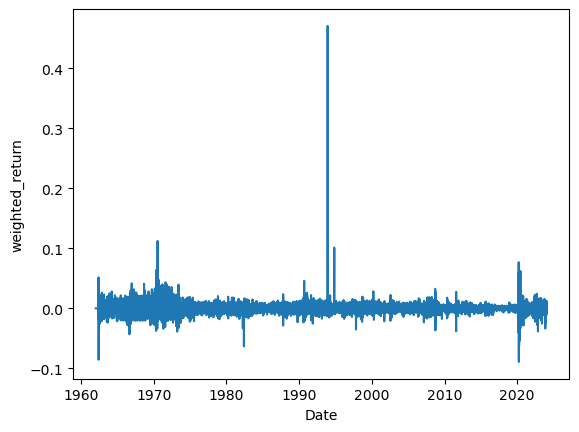

In [33]:
#plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['weighted_return'])
plt.xlabel('Date')
plt.ylabel('weighted_return')

Text(0, 0.5, 'cumulative_return')

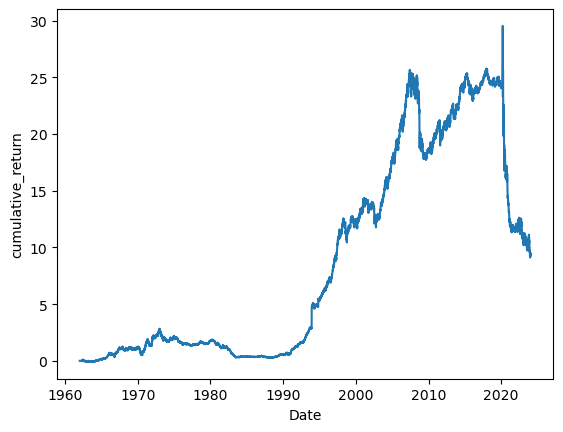

In [34]:
plt.plot((1 + df['weighted_return']).cumprod() - 1)
plt.xlabel('Date')
plt.ylabel('cumulative_return')

In [71]:
df['weighted_return'].sort_values()

Date
2020-03-24   -0.089276
1962-05-29   -0.085595
2020-03-19   -0.071374
1982-05-26   -0.063451
2020-04-06   -0.061719
                ...   
2020-03-18    0.074486
2020-03-16    0.076885
1994-10-31    0.101159
1970-07-08    0.112285
1993-12-01    0.470643
Name: weighted_return, Length: 15619, dtype: float64

In [35]:
print(((1 + df['weighted_return']).cumprod() - 1)[-1])

9.375887405615869


/var/folders/l_/m6g3497s5j77bqb9jr7506tc0000gn/T/ipykernel_15252/3388898895.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(((1 + df['weighted_return']).cumprod() - 1)[-1])


Step 3: Calculate annual returns and sharpe ratio for your strategy

In [76]:
# Annual Return 
np.prod(1 + df['weighted_return']) ** (1 / (df.index[-1].year-df.index[0].year)) - 1

0.038454575107735645

In [56]:
# Sharpe Ratio (risk free element excluded for simplicity)
sharpe_ratio = df['weighted_return'].mean() / df['weighted_return'].std() * np.sqrt(365)
sharpe_ratio

0.4317214258949516

#### Congraduation!!! You have written the first backtesting code yourself!!! 